In [1]:
import matplotlib.pyplot as plt
import numpy as np

### loadDataSet
* 输入：文件名
* 输出：数据的特征矩阵xArr,真实输出矩阵yArr
* 收集准备数据

In [2]:
def loadDataSet(fileName):

    numFeat = len(open(fileName).readline().split('\t')) - 1            # 特征的数目
    xArr = []                                                          
    yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')                      # 读取一行数据，并以tab分割
        for i in range(numFeat):                            # range(numFeat)结果为0，1
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)                                # 取前两列，结果为嵌套列表
        yArr.append(float(curLine[-1]))                     # 其最后一列
                                                            # print(xArr)
    return xArr, yArr

In [3]:
def standRegres(xArr, yArr):
    """
    函数说明:计算回归系数w
    Parameters:
        xArr - x数据集
        yArr - y数据集
    Returns:
        ws - 回归系数

    """
    xMat = np.mat(xArr)                                         # 200*2
    yMat = np.mat(yArr).T                               # 200 *1

    xTx = xMat.T * xMat                                # 根据文中推导的公示计算回归系数
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [4]:
def plotRegression():
    """
    函数说明:绘制回归曲线和数据点
    Parameters:
        无
    Returns:
        无
    """
    xArr, yArr = loadDataSet('ex0.txt')  # 加载数据集
    ws = standRegres(xArr, yArr)  # 计算回归系数
    print(ws)
    xMat = np.mat(xArr)  # 创建xMat矩阵
    yMat = np.mat(yArr)  # 创建yMat矩阵
    xCopy = xMat.copy()  # 深拷贝xMat矩阵
    xCopy.sort(0)  # 排序
    yHat = xCopy * ws  # 计算对应的y值
    fig = plt.figure()
    ax = fig.add_subplot(111)  # 添加subplot
    ax.plot(xCopy[:, 1], yHat, c='red')  # 绘制回归曲线
    ax.scatter(xMat[:, 1].flatten().A[0], yMat.flatten().A[0], s=20, c='blue', alpha=.5)  # 绘制样本点
    plt.title('DataSet')  # 绘制title
    plt.xlabel('X')
    plt.show()

[[3.00774324]
 [1.69532264]]


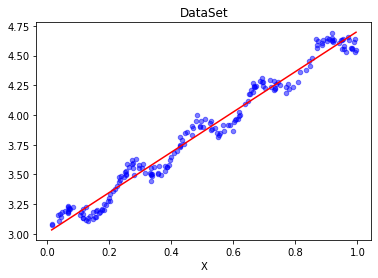

In [5]:
plotRegression()